<a href="https://colab.research.google.com/github/shourav47/Data-Analysis/blob/main/Market_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing the library

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/dataset/supermarket_sales - Sheet1.csv')


In [ ]:
display(df.head())

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
#find all rows having the price graeter than 100$
df_price = df[df['Unit price']>80.00]
display(df_price.head())

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,3/25/2019,18:30,Ewallet,597.73,4.761905,29.8865,4.1
15,299-46-1805,B,Mandalay,Member,Female,Sports and travel,93.72,6,28.1160,590.4360,1/15/2019,16:19,Cash,562.32,4.761905,28.1160,4.5
20,300-71-4605,C,Naypyitaw,Member,Male,Electronic accessories,86.04,5,21.5100,451.7100,2/25/2019,11:24,Ewallet,430.20,4.761905,21.5100,4.8
21,371-85-5789,B,Mandalay,Normal,Male,Health and beauty,87.98,3,13.1970,277.1370,3/5/2019,10:40,Ewallet,263.94,4.761905,13.1970,5.1


In [ ]:
df_city = df['City'].value_counts()
print(df_city)

Yangon       340
Mandalay     332
Naypyitaw    328
Name: City, dtype: int64


In [ ]:
#find all the rows with city name Mandaly
df_city_mandaly = df[df['City'] == 'Mandalay']
display(df_city_mandaly)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Mandalay,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Mandalay,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Mandalay,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Mandalay,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Mandalay,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Mandalay,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Mandalay,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Mandalay,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [ ]:
#plt.style.use('seaborn')
print(plt.style.available)

####lineplot: 
**x_axis** = categorical<br>
**y_axis** = Numerical<br>
 The x list acts as our categorical variable list, while the y list acts as the numerical variable list.

In [33]:
df_f5 = df.sample(15)
display(df_f5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
182,851-28-6367,A,Mandalay,Member,Male,Sports and travel,15.50,10,7.7500,162.7500,3/23/2019,10:55,Ewallet,155.00,4.761905,7.7500,8.0
647,574-31-8277,B,Mandalay,Member,Male,Fashion accessories,33.63,1,1.6815,35.3115,3/20/2019,19:55,Cash,33.63,4.761905,1.6815,5.6
65,877-22-3308,A,Mandalay,Member,Male,Health and beauty,15.87,10,7.9350,166.6350,3/13/2019,16:40,Cash,158.70,4.761905,7.9350,5.8
921,181-82-6255,B,Mandalay,Normal,Female,Home and lifestyle,16.37,6,4.9110,103.1310,2/8/2019,10:58,Cash,98.22,4.761905,4.9110,7.0
732,756-49-0168,A,Mandalay,Member,Male,Fashion accessories,19.70,1,0.9850,20.6850,2/8/2019,11:39,Ewallet,19.70,4.761905,0.9850,9.5
252,883-17-4236,C,Mandalay,Normal,Female,Sports and travel,14.39,2,1.4390,30.2190,3/2/2019,19:44,Credit card,28.78,4.761905,1.4390,7.2
574,550-84-8664,A,Mandalay,Normal,Male,Sports and travel,85.91,5,21.4775,451.0275,3/22/2019,14:33,Credit card,429.55,4.761905,21.4775,8.6
861,840-76-5966,A,Mandalay,Member,Male,Sports and travel,12.76,2,1.2760,26.7960,1/8/2019,18:06,Ewallet,25.52,4.761905,1.2760,7.8
111,210-67-5886,C,Mandalay,Member,Female,Health and beauty,98.21,3,14.7315,309.3615,2/5/2019,10:41,Credit card,294.63,4.761905,14.7315,7.8
785,404-91-5964,A,Mandalay,Normal,Male,Electronic accessories,74.58,7,26.1030,548.1630,2/4/2019,16:09,Credit card,522.06,4.761905,26.1030,9.0


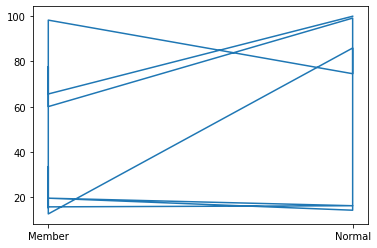

In [34]:
plt.plot(df_f5['Customer type'],df_f5['Unit price'])
plt.show()
plt.text(x,y, s= 'this is to write on a image')

In [27]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [ ]:
stack barchart